In [2]:
!pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/44/50/7db2cd5e6373ae796f0ddad3675268c8d59fb6076e66f0c339d61cea886b/pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 959.7 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4a/86/bb508f20bdda70b5e7afdc15065ea8a4a5ce12d5f5822fa58cf3bc31e8fc/matplotlib-3.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/a6/ab/7e5f53c3b9d14972843a647d8d7a853969a58aecc7559cb3267302c94774/tzdata-2024.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a9/57/86c500d63b3e26e5b73a28b8291a6

/tmp/ipykernel_1235488/1685641688.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


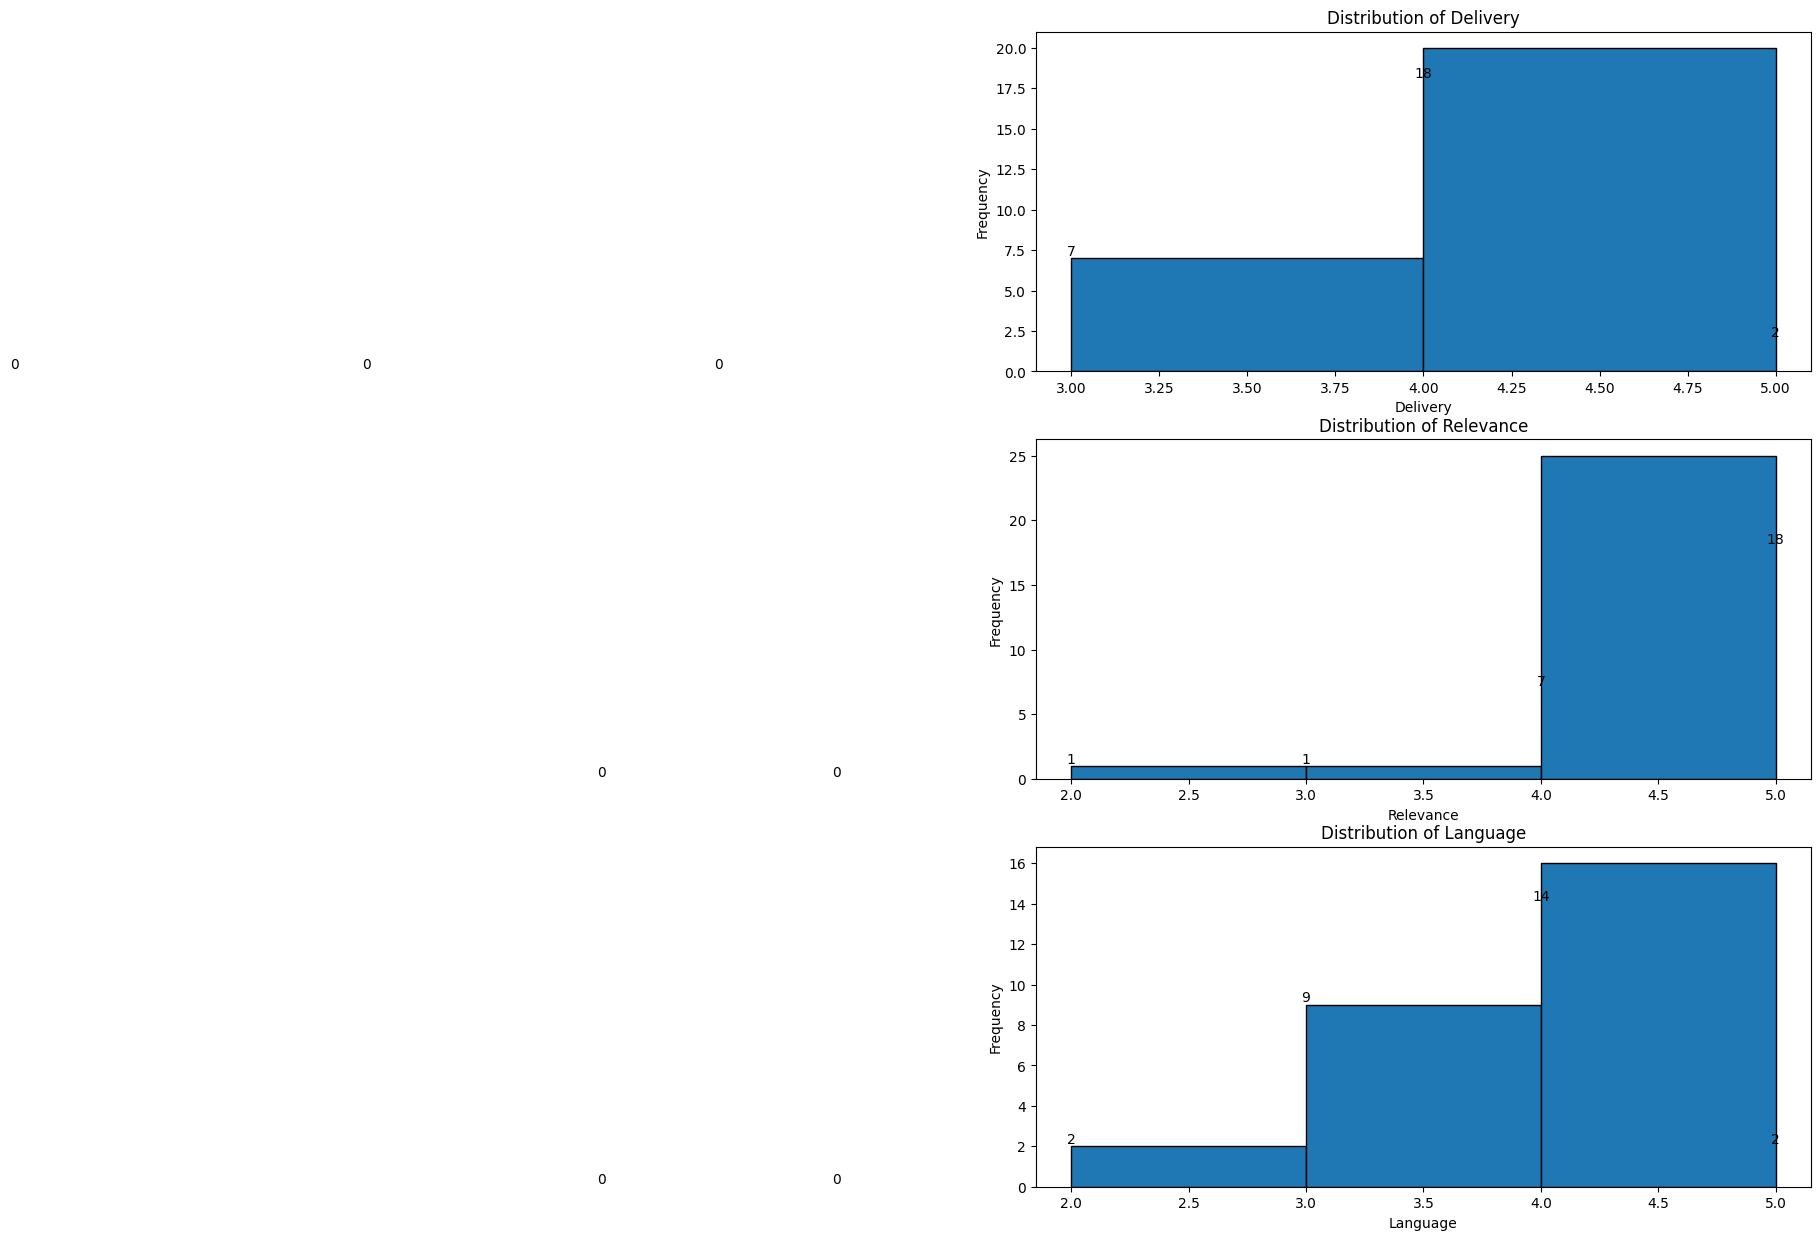

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import math

# Read the CSV file
df = pd.read_csv('picture-description/cleaned_dev_1764_0520_merged.csv')

# Apply math.ceil to the specified columns
df['delivery'] = df['delivery'].apply(math.ceil)
df['relevance'] = df['relevance'].apply(math.ceil)
df['language'] = df['language'].apply(math.ceil)

# Plot the distributions
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].hist(df['delivery'], bins=range(df['delivery'].min(), df['delivery'].max() + 1), edgecolor='black')
axes[0].set_title('Distribution of Delivery')
axes[0].set_xlabel('Delivery')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['relevance'], bins=range(df['relevance'].min(), df['relevance'].max() + 1), edgecolor='black')
axes[1].set_title('Distribution of Relevance')
axes[1].set_xlabel('Relevance')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['language'], bins=range(df['language'].min(), df['language'].max() + 1), edgecolor='black')
axes[2].set_title('Distribution of Language')
axes[2].set_xlabel('Language')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [3]:
# import the nessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import math


# 讀取 CSV 文件
train_df = pd.read_csv('picture-description/IS-itemized_train_base.csv')
dev_df = pd.read_csv('picture-description/IS-itemized_dev_base.csv')

# 合併兩個數據框
combined_df = pd.concat([train_df, dev_df])

# 增加 delivery+language, delivery+relevance, relevance+language 三列
combined_df['d+l'] = combined_df['delivery'] + combined_df['language']
combined_df['d+r'] = combined_df['delivery'] + combined_df['relevance']
combined_df['r+l'] = combined_df['relevance'] + combined_df['language']
combined_df['d+l+r'] = combined_df['relevance'] + combined_df['language'] + combined_df['delivery']
combined_df['d+l+r+e'] = combined_df['relevance'] + combined_df['language'] + combined_df['delivery'] + combined_df['extent']

# 選擇需要分析的列
columns_of_interest = ['holistic', 'delivery', 'relevance', 'extent', 'language', 'score', 'd+l', 'd+r', 'r+l', 'd+l+r', 'd+l+r+e']

# 計算相關性矩陣
correlation_matrix = combined_df[columns_of_interest].corr()

# 顯示相關性矩陣
#print(correlation_matrix)

# 顯示相關性矩陣，只顯示與 score 相關的部分
print(correlation_matrix['score'])
print(correlation_matrix['holistic'])

holistic     0.857023
delivery     0.841212
relevance    0.528710
extent       0.796390
language     0.844081
score        1.000000
d+l          0.862409
d+r          0.773457
r+l          0.768083
d+l+r        0.828121
d+l+r+e      0.837707
Name: score, dtype: float64
holistic     1.000000
delivery     0.936803
relevance    0.630626
extent       0.884365
language     0.953873
score        0.857023
d+l          0.967479
d+r          0.884968
r+l          0.886630
d+l+r        0.943085
d+l+r+e      0.947285
Name: holistic, dtype: float64
